# Baseline Model

This notebook is to showthe results for the baseline model.  This is the standard autoencoder architecture before adding any of the training methods to be analysed.

## Imports

In [0]:
from fastai import *
from fastai.tabular import *
import pandas as pd
from torchsummary import summary
import torch
from torch import nn
import imageio
import torch
import glob
from fastai.vision import *
import os
from torch import nn
import torch.nn.functional as F

## Data

In [0]:
colab = True
if colab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount = True)
  %cp "/content/drive/My Drive/autoencoder-training/data.zip" .
  !unzip -q data.zip
  image_path = "data"
  %cp "/content/drive/My Drive/autoencoder-training/model_layers.py" .
  %cp "/content/drive/My Drive/autoencoder-training/baseline_model.py" .
  import baseline_model
else: 
  os.chdir("../")
  image_path = os.getcwd() + "/data"
  from resnet_autoencoder_training import baseline_model

Mounted at /content/drive


In [0]:
np.random.seed(3333)
torch.manual_seed(3333)

size = 32
batchsize = 128

#tfms = get_transforms(do_flip = True)
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0, 
                      p_lighting=0.75)
src = (ImageImageList.from_folder(image_path).split_by_folder().label_from_func(lambda x: x))
data = (src.transform(tfms, size=size, tfm_y=True)
        .databunch(bs=batchsize)
        .normalize(imagenet_stats, do_y = False))

## Model

In [0]:
autoencoder = baseline_model.autoencoder()

In [0]:
learn = Learner(data,autoencoder,loss_func=F.mse_loss)

## Training

### Initial Training

Initialise the weights with a few epochs.

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,0.015553,0.014345,01:24
1,0.006999,0.008702,01:21
2,0.005979,0.017482,01:19
3,0.004344,0.005686,01:18
4,0.004124,0.005455,01:17


### Learning rate finder
Uising fastais learning rate finder, the optimal learning rate can be found for this baseline model. 20 epochs will be used to set the baseline, giving a total of 25 epochs for the model.

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.02E-05
Min loss divided by 10: 6.31E-08


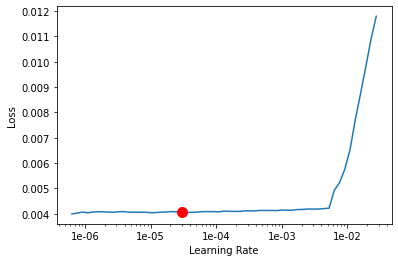

In [0]:
learn.recorder.plot(suggestion = True)

In [0]:
learn.metrics = [mean_squared_error, mean_absolute_error, r2_score, explained_variance]

In [0]:
learn.fit_one_cycle(10, max_lr = 1e-3)

epoch,train_loss,valid_loss,mean_squared_error,mean_absolute_error,r2_score,explained_variance,time
0,0.004019,0.005606,0.005606,0.053604,0.908575,0.910711,01:18
1,0.004062,0.005428,0.005428,0.052808,0.911449,0.912157,01:18
2,0.003927,0.005232,0.005232,0.051596,0.914668,0.915670,01:20
3,0.003775,0.005184,0.005184,0.051367,0.915440,0.917307,01:21
4,0.003669,0.004824,0.004824,0.049380,0.921317,0.921391,01:23
5,0.003487,0.004760,0.004760,0.049367,0.922335,0.922790,01:25
6,0.003312,0.004932,0.004932,0.051041,0.919537,0.923248,01:25
7,0.003186,0.004780,0.004780,0.049712,0.922005,0.924292,01:25
8,0.003157,0.004365,0.004365,0.046426,0.928784,0.928989,01:26
9,0.003060,0.004345,0.004345,0.046274,0.929123,0.929232,01:27


## Results

### Training

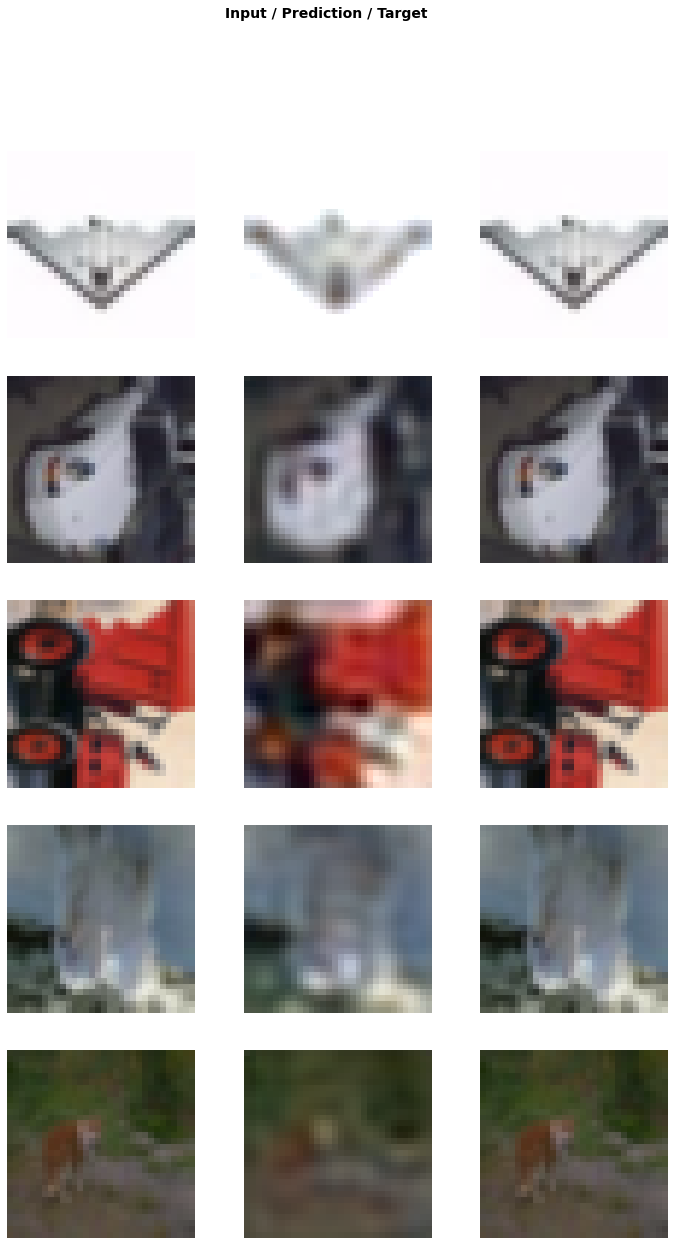

In [0]:
learn.show_results(ds_type=DatasetType.Train)

### Valid

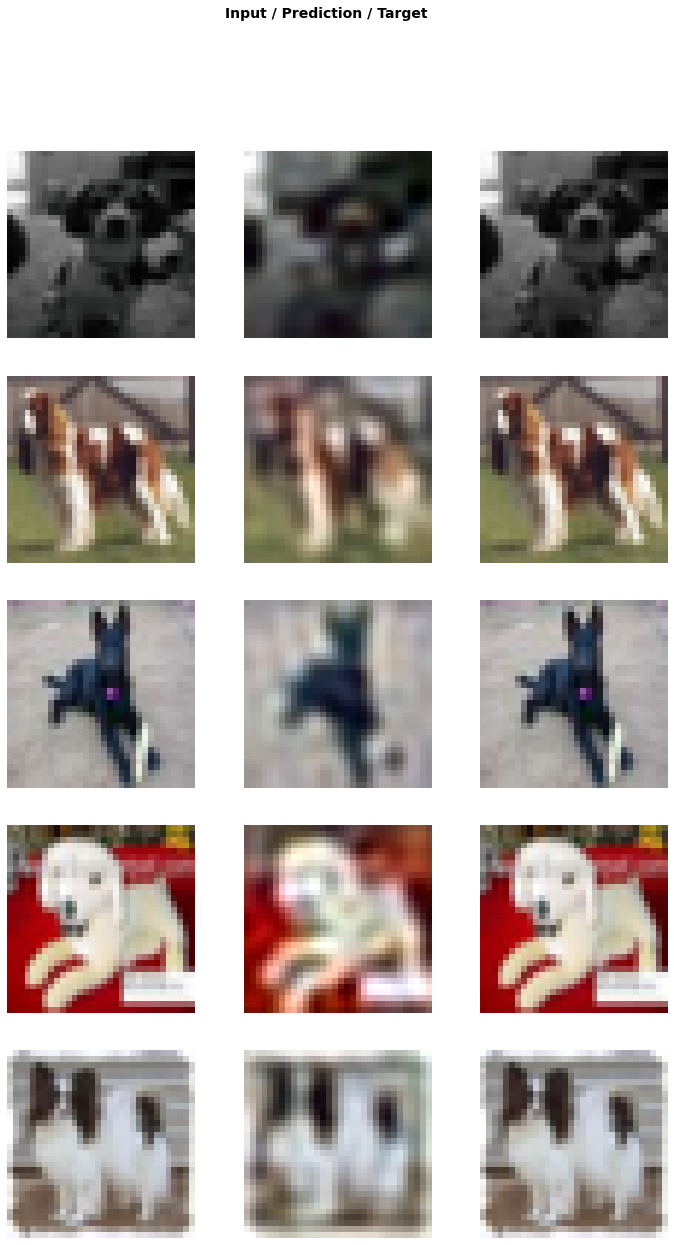

In [0]:
learn.show_results(ds_type=DatasetType.Valid)

In [0]:
torch.save(autoencoder, "/content/drive/My Drive/autoencoder-training/baseline-Cifar10.pt")